In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [14]:
df = pd.read_excel ('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx')

#* [Delay Analysis]() 👈 Data Analysis 
# [Pricing Optimization](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv) 👈 Machine Learning 


In [ ]:
df.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [16]:
df.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


In [17]:
df.isna()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,False,False,False,False,True,True,True
1,False,False,False,False,False,True,True
2,False,False,False,False,False,True,True
3,False,False,False,False,True,True,True
4,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...
21305,False,False,False,False,True,False,False
21306,False,False,False,False,False,True,True
21307,False,False,False,False,False,True,True
21308,False,False,False,False,False,True,True


Nettoyage des données

In [18]:
# Nettoyage : on ne garde que les locations terminées (state == 'ended')
df_ended = df[df['state'] == 'ended']

# 1. Proportion de locations en retard
retard = df_ended['delay_at_checkout_in_minutes'] > 0
proportion_retard = retard.mean()
print(f"Proportion de locations en retard : {proportion_retard:.2%}")

# 2. Statistiques sur la durée des retards
retards = df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]['delay_at_checkout_in_minutes']
print("Durée moyenne du retard (minutes) :", retards.mean())
print("Durée médiane du retard (minutes) :", retards.median())
print("95e percentile du retard (minutes) :", retards.quantile(0.95))

# 3. Retard par type de check-in
print("\nRetard moyen par mode de check-in :")
print(df_ended.groupby('checkin_type')['delay_at_checkout_in_minutes'].mean())


Proportion de locations en retard : 52.11%
Durée moyenne du retard (minutes) : 201.79147171416417
Durée médiane du retard (minutes) : 53.0
95e percentile du retard (minutes) : 745.0

Retard moyen par mode de check-in :
checkin_type
connect   -43.627278
mobile     88.215174
Name: delay_at_checkout_in_minutes, dtype: float64


Calcul des retards

In [21]:
proportion_connectees = df[(df['checkin_type'] == 'connect') & (df['delay_at_checkout_in_minutes'] > 0)].shape[0] / df[df['checkin_type'] == 'connect'].shape[0]
print(f"Proportion de voitures connectées affectées : {proportion_connectees:.2%}")


Proportion de voitures connectées affectées : 33.88%


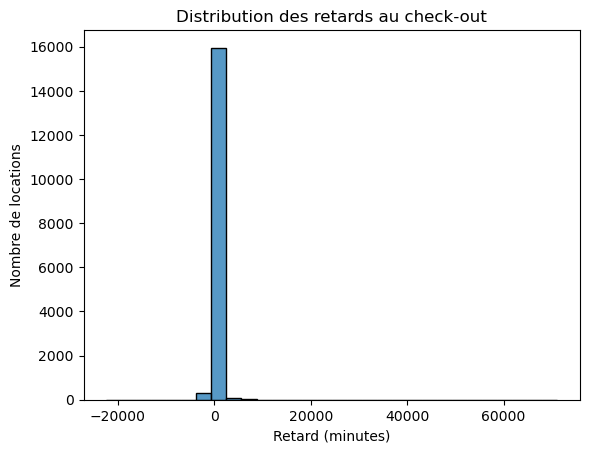

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['delay_at_checkout_in_minutes'], bins=30)
plt.title("Distribution des retards au check-out")
plt.xlabel("Retard (minutes)")
plt.ylabel("Nombre de locations")
plt.show()

In [ ]:
Analyse des annulations

Combien de locations affectées par des retards ?

In [ ]:
nb_retards = (df['delay_in_minutes'] > 0).sum()


Histogramme des retards

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['delay_in_minutes'], bins=30)
plt.show()

KeyError: 'delay_in_minutes'

In [ ]:
# 1. Proportion de locations annulées
annulees = df[df['state'] == 'canceled']
proportion_annulees = len(annulees) / len(df)
print(f"Proportion de locations annulées : {proportion_annulees:.2%}")

# 2. Répartition des annulations par mode de check-in
print("\nRépartition des annulations par mode de check-in :")
print(annulees['checkin_type'].value_counts(normalize=True))

# 3. Répartition des annulations par mode d'annulation (s'il existe une colonne 'cancellation_type')
if 'cancellation_type' in annulees.columns:
    print("\nRépartition des modes d'annulation :")
    print(annulees['cancellation_type'].value_counts(normalize=True))


Proportion de locations annulées : 15.32%

Répartition des annulations par mode de check-in :
checkin_type
mobile     0.75559
connect    0.24441
Name: proportion, dtype: float64


Analyse du mode de location

In [ ]:
# 1. Part de chaque mode de check-in
print("\nPart de chaque mode de check-in :")
print(df['checkin_type'].value_counts(normalize=True))

# 2. Taux de retard par mode de check-in
taux_retard_par_mode = df_ended.groupby('checkin_type').apply(
    lambda d: (d['delay_at_checkout_in_minutes'] > 0).mean()
)
print("\nTaux de retard par mode de check-in :")
print(taux_retard_par_mode)

# 3. Taux d'annulation par mode de check-in
taux_annulation_par_mode = df.groupby('checkin_type').apply(
    lambda d: (d['state'] == 'canceled').mean()
)
print("\nTaux d'annulation par mode de check-in :")
print(taux_annulation_par_mode)



Part de chaque mode de check-in :
checkin_type
mobile     0.797888
connect    0.202112
Name: proportion, dtype: float64

Taux de retard par mode de check-in :
checkin_type
connect    0.415788
mobile     0.546574
dtype: float64

Taux d'annulation par mode de check-in :
checkin_type
connect    0.185280
mobile     0.145092
dtype: float64


Croiser mode de location, annulation et retard
Objectifs :
Les annulations sont-elles plus fréquentes sur certains modes de location ?
Les retards sont-ils plus problématiques sur certains modes ?

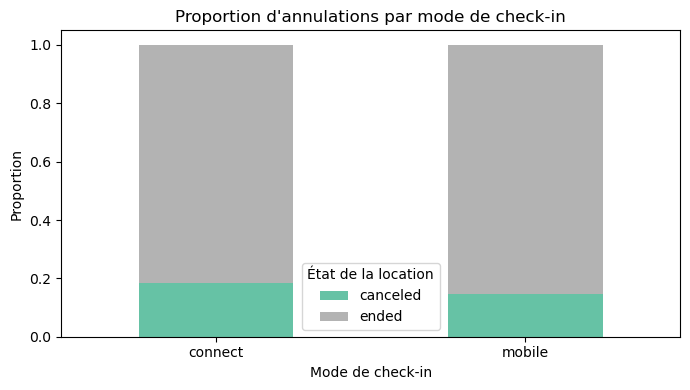

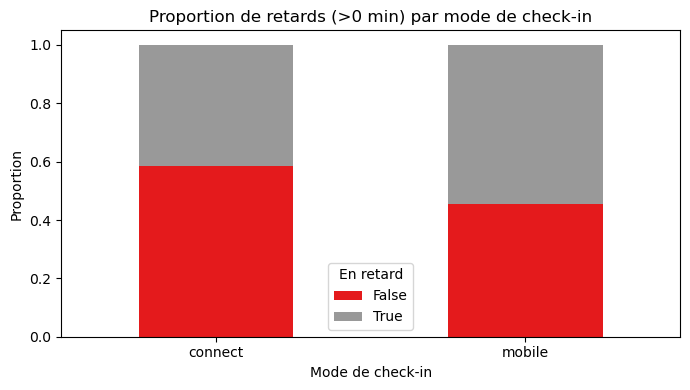

In [23]:
# 1. Tableau croisé : annulation par mode de check-in
ct_annulation = pd.crosstab(df['checkin_type'], df['state'], normalize='index')
ax1 = ct_annulation.plot(kind='bar', stacked=True, rot=0, figsize=(7,4), colormap='Set2')
plt.title("Proportion d'annulations par mode de check-in")
plt.ylabel("Proportion")
plt.xlabel("Mode de check-in")
plt.legend(title="État de la location")
plt.tight_layout()
plt.show()

# 2. Tableau croisé : retard > 0 par mode de check-in
df_ended = df[df['state'] == 'ended'].copy()
df_ended['en_retard'] = df_ended['delay_at_checkout_in_minutes'] > 0
ct_retard = pd.crosstab(df_ended['checkin_type'], df_ended['en_retard'], normalize='index')
ax2 = ct_retard.plot(kind='bar', stacked=True, rot=0, figsize=(7,4), colormap='Set1')
plt.title("Proportion de retards (>0 min) par mode de check-in")
plt.ylabel("Proportion")
plt.xlabel("Mode de check-in")
plt.legend(title="En retard")
plt.tight_layout()
plt.show()


In [26]:
df = pd.read_csv('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv')

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

X = df.drop("rental_price_per_day", axis=1)
y = df["rental_price_per_day"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

joblib.dump(model, "app/model.pkl")

ValueError: could not convert string to float: 'Audi'